In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import r2_score

In [7]:
X_train = pd.read_csv('abalone.csv')
X_train.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
def sex_mapper(word):
    if word == 'M':
        return 1
    elif word == 'I':
        return 0
    else:
        return -1

In [9]:
X_train['Sex'] = X_train['Sex'].apply(sex_mapper)
# or X_train['Sex'] = X_train['Sex'].apply(lamda x: 1 if x == 'M' else (0 if x == 'I' else -1))
# or X['Sex'].replace({'F': -1, 'I': 0, 'M': 1}, inplace=True)
X_train.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
y_train = X_train['Rings']
X_train.drop('Rings', axis=1, inplace=True)
X_train.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [36]:
validator = KFold(n=y_train.size, n_folds=5, shuffle=True, random_state=1)
scorer = r2_score
scores = []

for n_trees in range(50):
    clf = RandomForestRegressor(n_estimators=n_trees+1)
    cvs_params = {'estimator': clf, 'X': X_train, 'y': y_train, 'cv': validator, 'scoring': 'r2'}
    cvs = cross_val_score(**cvs_params)
    scores.append(cvs.mean())

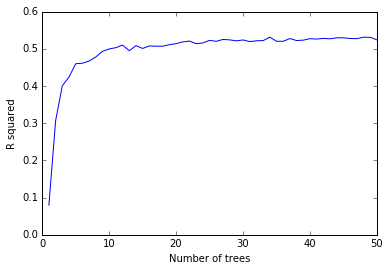

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(50)+1, scores)
plt.xlabel('Number of trees')
plt.ylabel('R squared')
plt.show()

In [38]:
for idx, s in enumerate(scores):
    if s > 0.52:
        min_trees = idx + 1
        score = s
        break
print('Min number of trees with R squared > 0.52 is {} (R squared = {})'.format(min_trees, 
      score))

Min number of trees with R squared > 0.52 is 22 (R squared = 0.5208168807188369)
